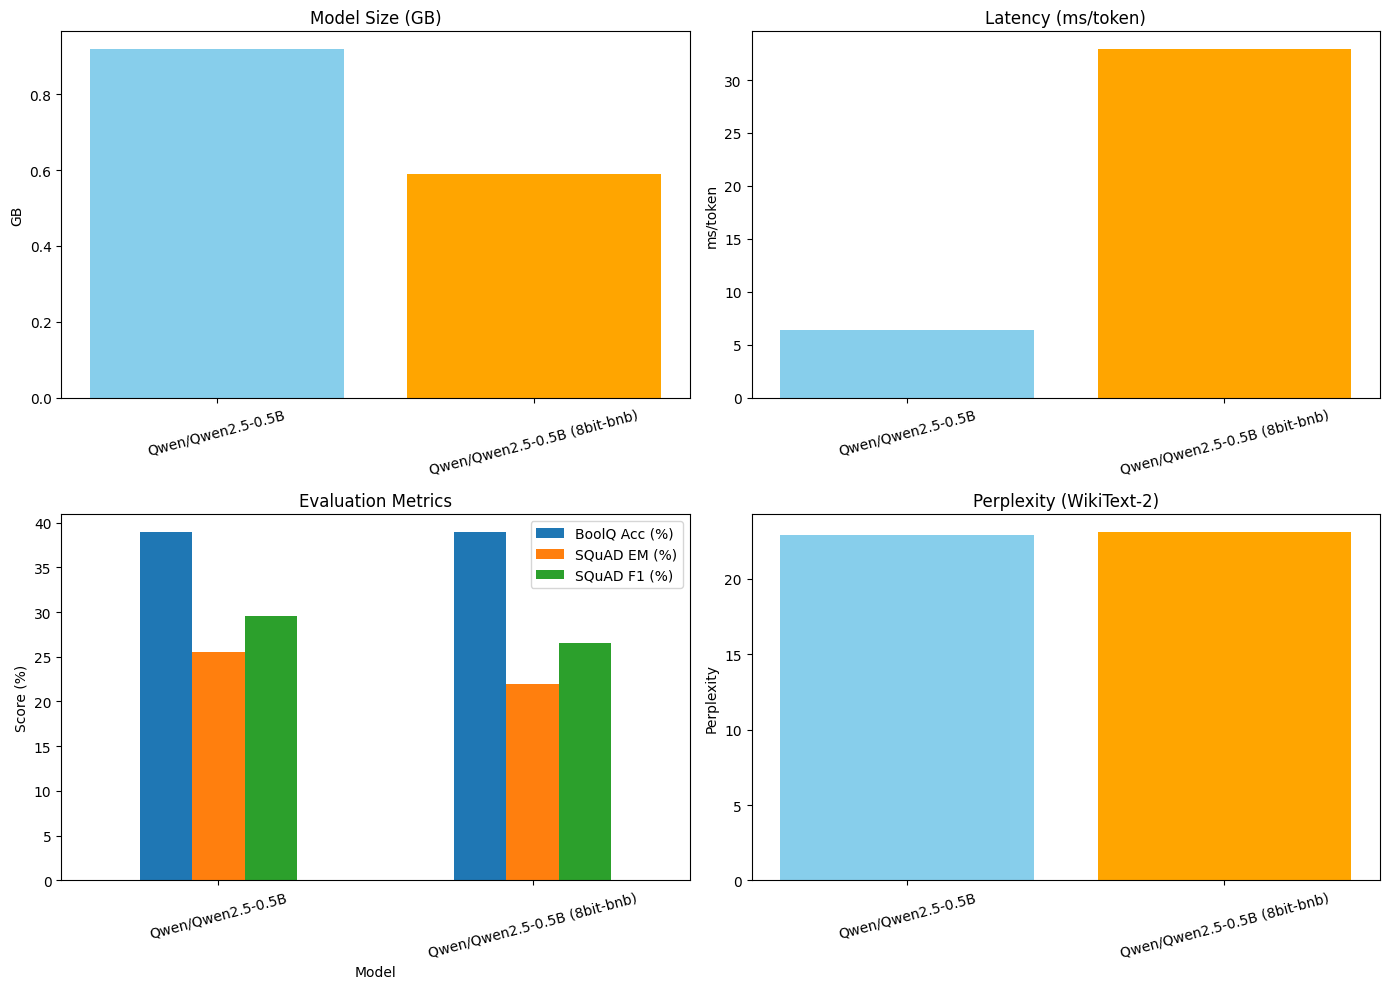

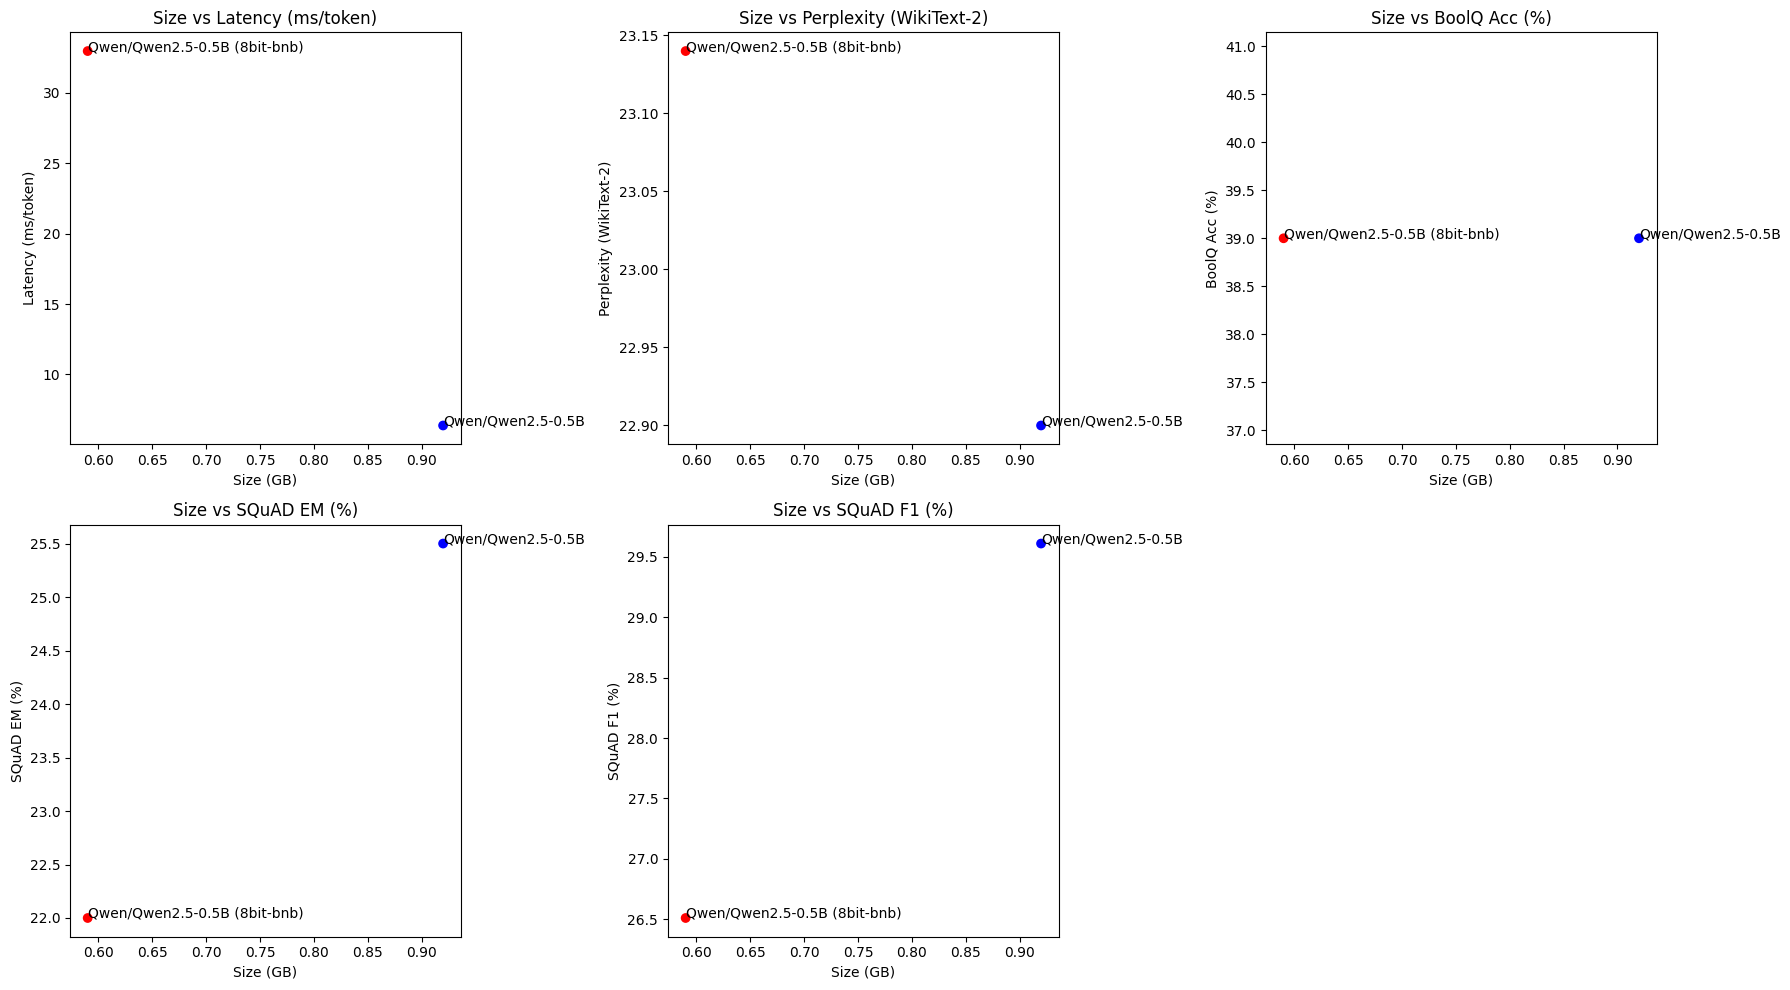

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Hardcoded data
data = {
    "Model": ["Qwen/Qwen2.5-0.5B", "Qwen/Qwen2.5-0.5B (8bit-bnb)"],
    "Size (GB)": [0.92, 0.59],
    "Latency (ms/token)": [6.38, 32.95],
    "Perplexity (WikiText-2)": [22.9, 23.14],
    "BoolQ Acc (%)": [39.0, 39.0],
    "SQuAD EM (%)": [25.5, 22.0],
    "SQuAD F1 (%)": [29.61, 26.51]
}

df = pd.DataFrame(data)

# ---- BAR PLOTS ----
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Model Size
axes[0, 0].bar(df["Model"], df["Size (GB)"], color=["skyblue", "orange"])
axes[0, 0].set_title("Model Size (GB)")
axes[0, 0].set_ylabel("GB")
axes[0, 0].tick_params(axis='x', rotation=15)

# Latency
axes[0, 1].bar(df["Model"], df["Latency (ms/token)"], color=["skyblue", "orange"])
axes[0, 1].set_title("Latency (ms/token)")
axes[0, 1].set_ylabel("ms/token")
axes[0, 1].tick_params(axis='x', rotation=15)

# Accuracy metrics
df.plot(x="Model", y=["BoolQ Acc (%)", "SQuAD EM (%)", "SQuAD F1 (%)"], 
        kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("Evaluation Metrics")
axes[1, 0].set_ylabel("Score (%)")
axes[1, 0].tick_params(axis='x', rotation=15)

# Perplexity
axes[1, 1].bar(df["Model"], df["Perplexity (WikiText-2)"], color=["skyblue", "orange"])
axes[1, 1].set_title("Perplexity (WikiText-2)")
axes[1, 1].set_ylabel("Perplexity")
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


# ---- SCATTER PLOTS: Size vs all others ----
metrics = ["Latency (ms/token)", "Perplexity (WikiText-2)", 
           "BoolQ Acc (%)", "SQuAD EM (%)", "SQuAD F1 (%)"]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].scatter(df["Size (GB)"], df[metric], color=["blue", "red"])
    for j, txt in enumerate(df["Model"]):
        axes[i].annotate(txt, (df["Size (GB)"][j], df[metric][j]))
    axes[i].set_title(f"Size vs {metric}")
    axes[i].set_xlabel("Size (GB)")
    axes[i].set_ylabel(metric)

# Hide extra subplot if odd number
if len(metrics) < len(axes):
    axes[-1].axis("off")

plt.tight_layout()
plt.show()